In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Objective & Context
This notebook conducts technical analysis on the VFV stock.
We’ll explore price trends, moving averages, and technical indicators to assess market behavior.

In [30]:
# Load Data
vfv_data = pd.read_csv('../data/vfv_raw_data.csv', parse_dates=['Date'], index_col='Date')
vfv_data.sort_index(inplace=True)
vfv_data.rename(columns={'Market price (CAD)': 'Close'}, inplace=True)
vfv_data['Close'] = vfv_data['Close'].replace('[\$,]', '', regex=True).astype(float)
vfv_data

<>:5: SyntaxWarning: invalid escape sequence '\$'
<>:5: SyntaxWarning: invalid escape sequence '\$'
/var/folders/d_/vtbtm_tx56jbs30plxf7r3mh0000gn/T/ipykernel_69253/950173769.py:5: SyntaxWarning: invalid escape sequence '\$'
  vfv_data['Close'] = vfv_data['Close'].replace('[\$,]', '', regex=True).astype(float)


,NAV (CAD),Close
Date,,
2014-11-18,$41.2499,41.245
2014-11-19,$41.3631,41.360
2014-11-20,$41.2772,41.285
2014-11-21,$41.2651,41.245
2014-11-24,$41.5520,41.565
...,...,...
2025-03-03,$150.7359,150.700
2025-03-04,$148.5961,148.600
2025-03-05,$148.8868,148.800


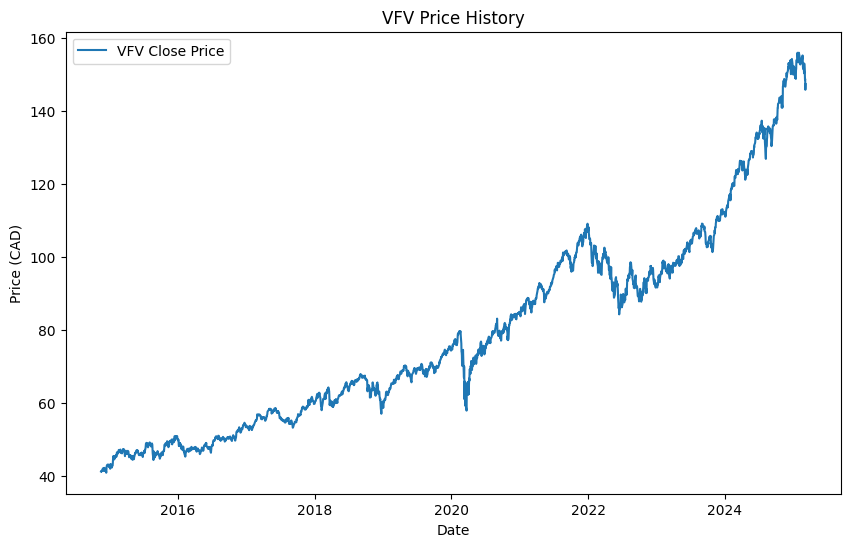

In [31]:
# Visualize Price History
plt.figure(figsize=(10,6))
plt.plot(vfv_data['Close'], label='VFV Close Price')
plt.title('VFV Price History')
plt.xlabel('Date')
plt.ylabel('Price (CAD)')
plt.legend()
plt.show()

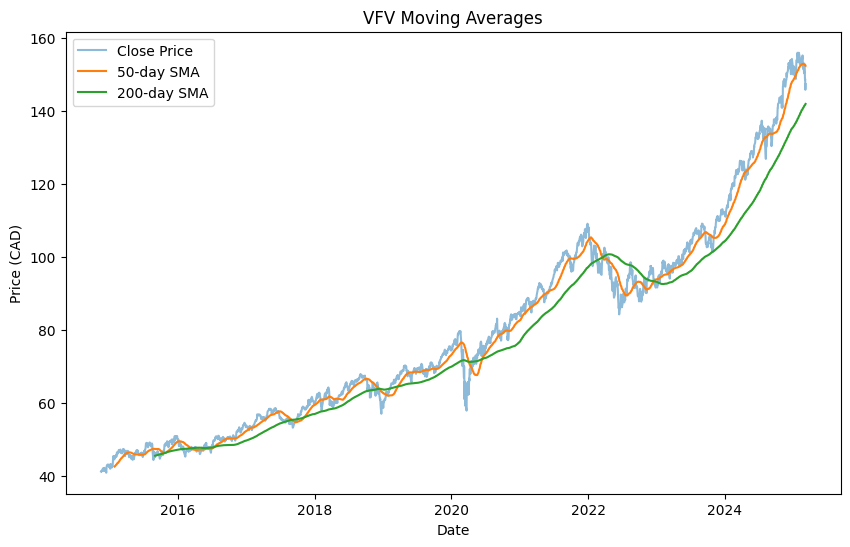

In [32]:
# Moving Averages
vfv_data['SMA50'] = vfv_data['Close'].rolling(window=50).mean()
vfv_data['SMA200'] = vfv_data['Close'].rolling(window=200).mean()

plt.figure(figsize=(10,6))
plt.plot(vfv_data['Close'], label='Close Price', alpha=0.5)
plt.plot(vfv_data['SMA50'], label='50-day SMA')
plt.plot(vfv_data['SMA200'], label='200-day SMA')
plt.title('VFV Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price (CAD)')
plt.legend()
plt.show()

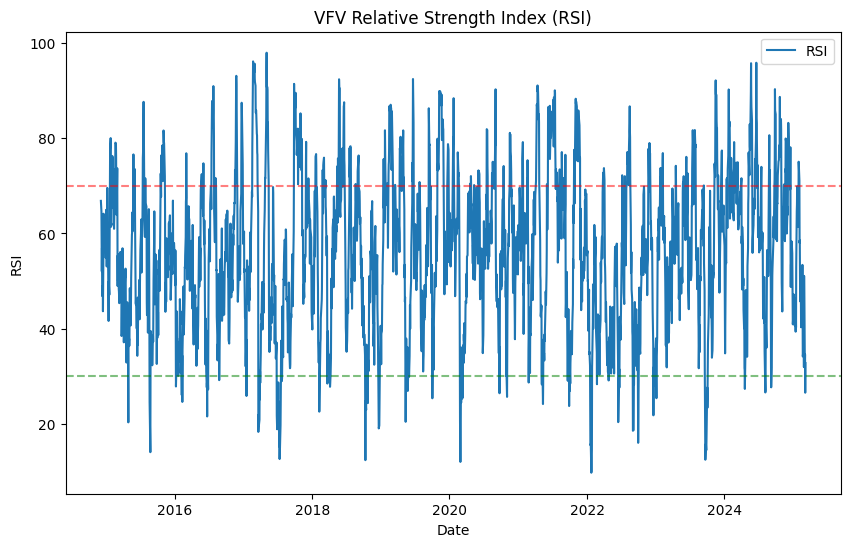

In [33]:
# Relative Strength Index (RSI)
def compute_rsi(data, window=14):
    delta = data.diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    return 100 - (100 / (1 + rs))

vfv_data['RSI'] = compute_rsi(vfv_data['Close'])

plt.figure(figsize=(10,6))
plt.plot(vfv_data['RSI'], label='RSI')
plt.axhline(70, color='red', linestyle='--', alpha=0.5)
plt.axhline(30, color='green', linestyle='--', alpha=0.5)
plt.title('VFV Relative Strength Index (RSI)')
plt.xlabel('Date')
plt.ylabel('RSI')
plt.legend()
plt.show()

### Relative Strength Index (RSI)
VFV shows frequent volatility with sharp swings between overbought (above 70) and oversold (below 30) levels, indicating strong price fluctuations. It often enters overbought territory, suggesting potential price corrections, while dips below 30 highlight possible buying opportunities. Despite these extremes, the RSI mostly stays between 40 and 70, reflecting periods of more stable movement. Rapid shifts in market sentiment suggest external factors drive price changes, but the lack of prolonged extreme values points to overall long-term stability.

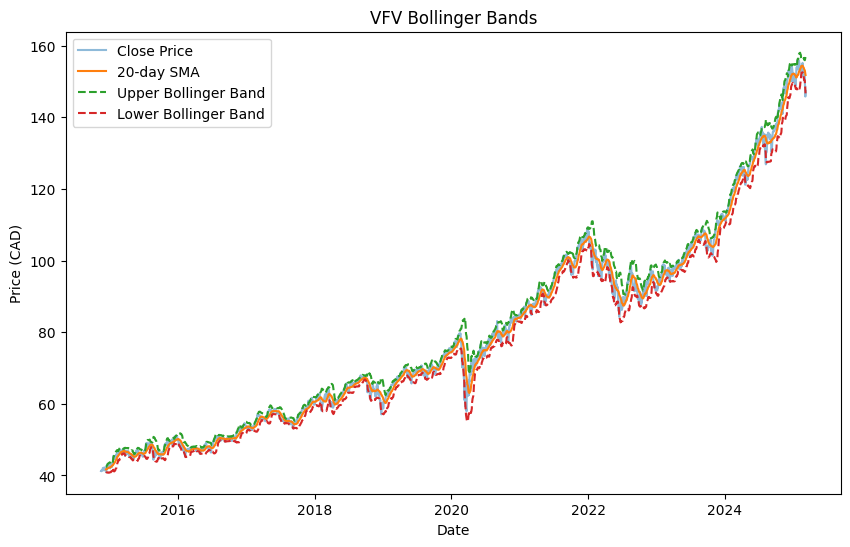

In [34]:
# Bollinger Bands
vfv_data['SMA20'] = vfv_data['Close'].rolling(window=20).mean()
vfv_data['STD20'] = vfv_data['Close'].rolling(window=20).std()
vfv_data['Upper_BB'] = vfv_data['SMA20'] + (2 * vfv_data['STD20'])
vfv_data['Lower_BB'] = vfv_data['SMA20'] - (2 * vfv_data['STD20'])

plt.figure(figsize=(10,6))
plt.plot(vfv_data['Close'], label='Close Price', alpha=0.5)
plt.plot(vfv_data['SMA20'], label='20-day SMA')
plt.plot(vfv_data['Upper_BB'], label='Upper Bollinger Band', linestyle='--')
plt.plot(vfv_data['Lower_BB'], label='Lower Bollinger Band', linestyle='--')
plt.title('VFV Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price (CAD)')
plt.legend()
plt.show()

### VFV Bollinger Bands
VFV’s Bollinger Bands show a consistent upward price trend since 2015, with prices often testing the upper band, indicating strong bullish momentum. The 20-day SMA closely tracks the price, showing alignment with the overall trend, while occasional dips toward the lower band suggest brief corrections or buying opportunities. The bands widen during periods of increased volatility and tighten when price movements stabilize, reflecting shifts in market uncertainty and momentum. The overall pattern suggests sustained growth with periodic pullbacks.

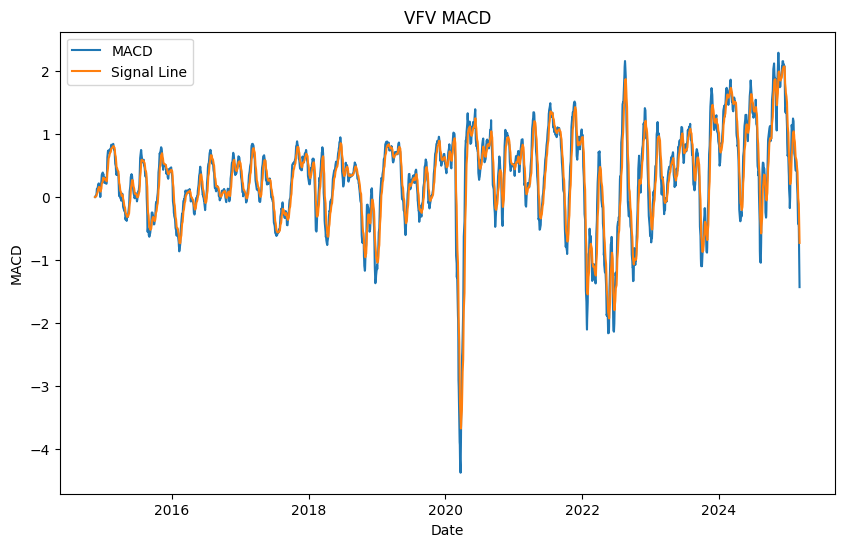

In [35]:
# MACD (Moving Average Convergence Divergence)
vfv_data['EMA12'] = vfv_data['Close'].ewm(span=12, adjust=False).mean()
vfv_data['EMA26'] = vfv_data['Close'].ewm(span=26, adjust=False).mean()
vfv_data['MACD'] = vfv_data['EMA12'] - vfv_data['EMA26']
vfv_data['Signal'] = vfv_data['MACD'].ewm(span=9, adjust=False).mean()

plt.figure(figsize=(10,6))
plt.plot(vfv_data['MACD'], label='MACD')
plt.plot(vfv_data['Signal'], label='Signal Line')
plt.title('VFV MACD')
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()
plt.show()

### Moving Average Convergence Divergence
VFV’s MACD (Moving Average Convergence Divergence) shows periods of strong momentum shifts, with multiple crossovers of the MACD line and the signal line, indicating frequent trend reversals. Spikes in the MACD values align with moments of increased volatility, while the sharp drop around early 2020 reflects a significant market correction. More recently, positive MACD values dominate, signaling overall bullish momentum with intermittent pullbacks. These crossovers offer potential buy and sell signals, making them valuable for timing market entries and exits.

In [36]:
print(vfv_data.columns)

Index(['NAV (CAD)', 'Close', 'SMA50', 'SMA200', 'RSI', 'SMA20', 'STD20',
       'Upper_BB', 'Lower_BB', 'EMA12', 'EMA26', 'MACD', 'Signal'],
      dtype='object')


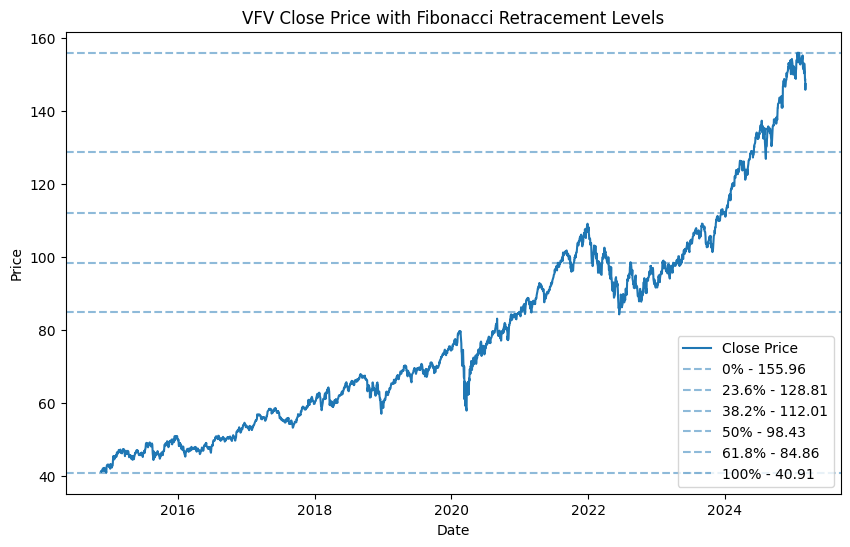

In [37]:
# Fibonacci Retracement Levels
high = vfv_data['Close'].max()
low = vfv_data['Close'].min()

fib_levels = {
    '0%': high,
    '23.6%': high - 0.236 * (high - low),
    '38.2%': high - 0.382 * (high - low),
    '50%': high - 0.5 * (high - low),
    '61.8%': high - 0.618 * (high - low),
    '100%': low
}

# Plotting the retracement levels
plt.figure(figsize=(10, 6))
plt.plot(vfv_data['Close'], label='Close Price')

for level, price in fib_levels.items():
    plt.axhline(price, linestyle='--', alpha=0.5, label=f'{level} - {price:.2f}')

plt.title('VFV Close Price with Fibonacci Retracement Levels')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

### Fibonacci Retracement Levels
VFV’s Fibonacci retracement levels highlight key support and resistance zones, reflecting potential price reversal points. The 23.6%, 38.2%, 50%, and 61.8% levels align with past consolidations and corrections, showing how the price often reacts around these areas. After a strong upward trend, the current price hovers near its recent high, suggesting possible pullbacks toward these retracement levels if momentum slows. These levels provide a valuable framework for identifying entry and exit points in VFV’s price action.

## Overall Takeaways
VFV has shown a strong and consistent uptrend over the years, with its price steadily increasing from around $40 CAD to nearly $160 CAD. Bollinger Bands indicate periods of high volatility, with the price frequently touching or exceeding the upper band, suggesting strong bullish momentum. The MACD analysis reveals positive momentum with occasional corrections, aligning with market cycles and reflecting healthy growth. Fibonacci retracement levels identify key support and resistance zones, highlighting potential pullback points in case of a correction. Overall, VFV’s technical indicators point to a well-performing asset with strong long-term growth, but it’s worth watching for signs of consolidation or short-term pullbacks around key retracement levels.